# Global Fashion Dataset - Phase 1: Exploratory Data Analysis (EDA)

In this phase, I will explore the six tables of the Global Fashion dataset:
- Customers
- Discounts
- Employees
- Products
- Stores
- Transactions

The goal of this step is to:
- Understand the structure of each table
- Check for data quality issues (missing values, duplicates)
- Get initial business insights
- Prepare for SQL joins and further analysis




In [1]:
# Step 1: Import core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Configure pandas display options for better readability
pd.set_option('display.max_columns', 50)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

# Step 2: Load all CSV files
customers = pd.read_csv('../data/customers.csv')
discounts = pd.read_csv('../data/discounts.csv')
employees = pd.read_csv('../data/employees.csv')
products = pd.read_csv('../data/products.csv')
stores = pd.read_csv('../data/stores.csv')
transactions = pd.read_csv('../data/transactions.csv')

print(" Data loaded successfully!")

C:\Users\Antifragile\AppData\Local\Temp\ipykernel_6552\3785583207.py:6: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  customers = pd.read_csv('../data/customers.csv')


 Data loaded successfully!


General Info & First Look

In [3]:
# Quick overview of all tables: shape and column names
tables = {
    "Customers": customers,
    "Discounts": discounts,
    "Employees": employees,
    "Products": products,
    "Stores": stores,
    "Transactions": transactions
}

for name, df in tables.items():
    print(f"\n=== {name} ===")
    print(f"Rows: {df.shape[0]}, Columns: {df.shape[1]}")
    print(df.columns.tolist())



=== Customers ===
Rows: 1643306, Columns: 9
['Customer ID', 'Name', 'Email', 'Telephone', 'City', 'Country', 'Gender', 'Date Of Birth', 'Job Title']

=== Discounts ===
Rows: 204, Columns: 6
['Start', 'End', 'Discont', 'Description', 'Category', 'Sub Category']

=== Employees ===
Rows: 403, Columns: 4
['Employee ID', 'Store ID', 'Name', 'Position']

=== Products ===
Rows: 14950, Columns: 12
['Product ID', 'Category', 'Sub Category', 'Description PT', 'Description DE', 'Description FR', 'Description ES', 'Description EN', 'Description ZH', 'Color', 'Sizes', 'Production Cost']

=== Stores ===
Rows: 35, Columns: 8
['Store ID', 'Country', 'City', 'Store Name', 'Number of Employees', 'ZIP Code', 'Latitude', 'Longitude']

=== Transactions ===
Rows: 6284272, Columns: 19
['Invoice ID', 'Line', 'Customer ID', 'Product ID', 'Size', 'Color', 'Unit Price', 'Quantity', 'Date', 'Discount', 'Line Total', 'Store ID', 'Employee ID', 'Currency', 'Currency Symbol', 'SKU', 'Transaction Type', 'Payment Met

In [5]:
import pandas as pd



# Total Transactions (rows without header)
print("Total Transactions:", len(df))

# Total Revenue
print("Total Revenue:", df["Invoice Total"].sum())


Total Transactions: 6284272
Total Revenue: 1622685428.6900005


# EDA by Tables


Customers Table

In [19]:
print("First few customers:")
print(customers.head())
print()

print("Basic info:")
print(f"Total customers: {len(customers):,}")
print(f"Countries we serve: {customers['Country'].nunique()}")
print(f"Top 5 countries:")
print(customers['Country'].value_counts().head())
print()

First few customers:
   Customer ID              Name                            Email  \
0            1      Mark Jenkins      mark.jenkins@fake_yahoo.com   
1            2      Steve Austin      steve.austin@fake_gmail.com   
2            3  Joseph Carpenter  joseph.carpenter@fake_gmail.com   
3            4     Samuel Harper     samuel.harper@fake_gmail.com   
4            5  Andrew Cervantes  andrew.cervantes@fake_yahoo.com   

              Telephone      City        Country Gender Date Of Birth  \
0            7358063121  New York  United States      M    2006-11-28   
1         (472)372-0384  New York  United States      M    2006-01-17   
2  +1-273-983-4369x6882  New York  United States      M    2003-08-24   
3         (334)892-8474  New York  United States      M    2007-02-08   
4   +1-599-458-8816x093  New York  United States      M    1998-09-29   

                             Job Title  
0                                  NaN  
1                                  NaN  
2 

In [22]:
# Check for issues
print("Data quality check:")
print(f"Missing values: {customers.isnull().sum().sum()}")
print(f"Duplicate Customer IDs: {customers['Customer ID'].duplicated().sum()}")
print()


Data quality check:
Missing values: 584153
Duplicate Customer IDs: 0



In [23]:
# Basic stats for numerical columns (e.g., age if derived from DOB)
customers.describe(include=['number'])


,Customer ID
count,"1,643,306.00"
mean,"821,653.50"
std,"474,381.73"
min,1.00
25%,"410,827.25"
50%,"821,653.50"
75%,"1,232,479.75"
max,"1,643,306.00"


C:\Users\Antifragile\AppData\Local\Temp\ipykernel_272\2107679170.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=customers, x='Gender', palette='Set2')


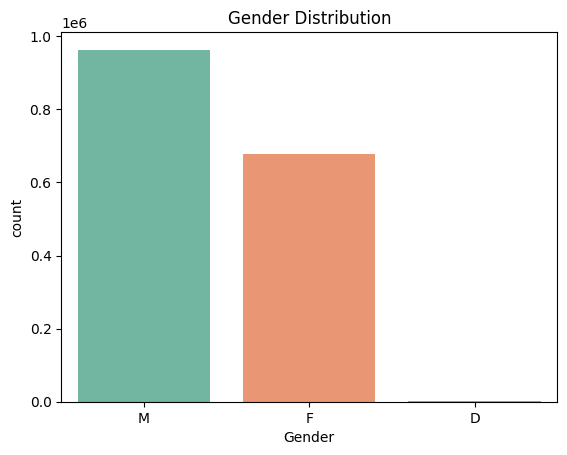

In [25]:
# Gender distribution
sns.countplot(data=customers, x='Gender', palette='Set2')
plt.title('Gender Distribution')
plt.show()


Discounts Table

In [31]:
# ===== DISCOUNTS TABLE =====
print("=== DISCOUNTS TABLE ===")
print("Our promotional campaigns")
print()

print(discounts.head())
print()

discounts.info()
discounts.describe()

print(f"Total discount campaigns: {len(discounts)}")
print("Discount categories:")
print(discounts['Category'].value_counts())
print()

=== DISCOUNTS TABLE ===
Our promotional campaigns

        Start         End  Discont  \
0  2020-01-01  2020-01-10     0.40   
1  2020-01-01  2020-01-10     0.40   
2  2020-01-01  2020-01-10     0.40   
3  2020-01-01  2020-01-10     0.40   
4  2020-01-01  2020-01-10     0.40   

                                    Description   Category  \
0  40% discount during our New Year Winter Sale   Feminine   
1  40% discount during our New Year Winter Sale   Feminine   
2  40% discount during our New Year Winter Sale  Masculine   
3  40% discount during our New Year Winter Sale  Masculine   
4  40% discount during our New Year Winter Sale   Children   

               Sub Category  
0         Coats and Blazers  
1     Sweaters and Knitwear  
2         Coats and Blazers  
3  Sweaters and Sweatshirts  
4                     Coats  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        

In [46]:
# Check for issues
print("Data quality check:")
print(f"Missing values: {discounts.isnull().sum().sum()}")
print()


Data quality check:
Missing values: 24



Products Table

=== PRODUCTS TABLE ===
Our product catalog - what are we selling?

Column names:
['Product ID', 'Category', 'Sub Category', 'Description PT', 'Description DE', 'Description FR', 'Description ES', 'Description EN', 'Description ZH', 'Color', 'Sizes', 'Production Cost']

First few products:
   Product ID  Category           Sub Category  \
0           1  Feminine      Coats and Blazers   
1           2  Feminine  Sweaters and Knitwear   
2           3  Feminine  Dresses and Jumpsuits   

                      Description PT                     Description DE  \
0  Esportivo Veludo Verde Com Botões       Sport Samt Sport Mit Knöpfen   
1      Luxuoso Denim Rosa Com Botões  Luxuriöser Rosa Jeans Mit Knöpfen   
2       Retrô Tricot Preto Estampado     Black Tricot Gedruckter Tricot   

                          Description FR                      Description ES  \
0  Sports Velvet Sports Avec Des Boutons  Deportes De Terciopelo Con Botones   
1     Léchard De Denim Rose Avec Boutons       D

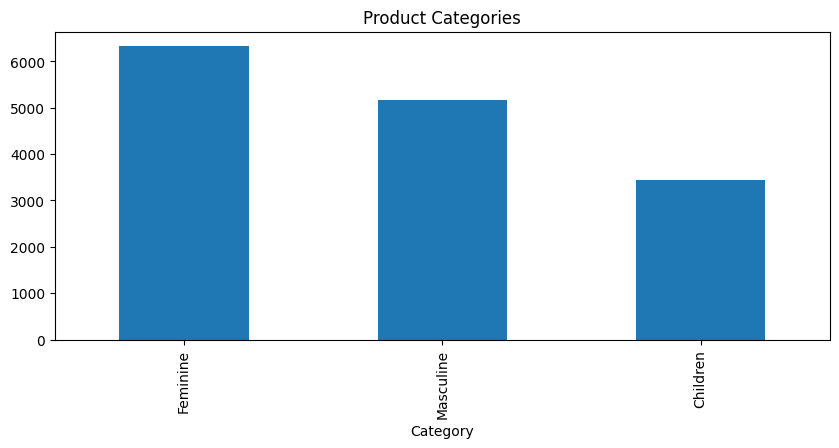

Price range:
Cheapest item: $0.51
Most expensive: $76.66
Average cost: $16.08



In [34]:
print("=== PRODUCTS TABLE ===") 
print("Our product catalog - what are we selling?")
print()

print("Column names:")
print(products.columns.tolist())
print()

print("First few products:")
print(products.head(3))
print()

print("Product breakdown:")
print(f"Total products: {len(products):,}")
print(f"Categories: {products['Category'].nunique()}")
print(f"Product categories:")
print(products['Category'].value_counts())
print()

products.info()
products['Category'].value_counts().plot(kind='bar', figsize=(10,4))
plt.title('Product Categories')
plt.show()

print("Price range:")
print(f"Cheapest item: ${products['Production Cost'].min():.2f}")
print(f"Most expensive: ${products['Production Cost'].max():.2f}")
print(f"Average cost: ${products['Production Cost'].mean():.2f}")
print()

In [50]:
# Check for issues
print("Data quality check:")
print(f"Missing values: {products.isnull().sum().sum()}")
print(f"Duplicate product IDs: {products['Product ID'].duplicated().sum()}")
print()


Data quality check:
Missing values: 12107
Duplicate product IDs: 0



Transactions Table

In [5]:
import pandas as pd



# Total Transactions (rows without header)
print("Total Transactions:", len(df))

# Total Revenue
print("Total Revenue:", df["Invoice Total"].sum())


Total Transactions: 6284272
Total Revenue: 1622685428.6900005


In [3]:
# Quick check - are these real duplicates or just same customer buying multiple times?
duplicates = transactions[transactions.duplicated(['Invoice ID', 'Line', 'Customer ID', 'Product ID'], keep=False)]
print(f"True duplicates (same invoice + line + customer + product): {len(duplicates)}")

# Also check if same customer has multiple invoices (normal)
customer_invoices = transactions.groupby('Customer ID')['Invoice ID'].nunique()
print(f"Average invoices per customer: {customer_invoices.mean():.1f}")

True duplicates (same invoice + line + customer + product): 16605
Average invoices per customer: 3.5


In [38]:
print("=== TRANSACTIONS TABLE ===")
print("The money maker - our sales data!")
print()

print("Column names:")
print(transactions.columns.tolist())
print()

print("Sample transactions:")
print(transactions.head(3))
print()

print("Sales overview:")
print(f"Total transactions: {len(transactions):,}")
print(f"Date range: {transactions['Date'].min()} to {transactions['Date'].max()}")
print(f"Total revenue: ${transactions['Line Total'].sum():,.2f}")
print()

print("Payment methods:")
print(transactions['Payment Method'].value_counts())
print()

=== TRANSACTIONS TABLE ===
The money maker - our sales data!

Column names:
['Invoice ID', 'Line', 'Customer ID', 'Product ID', 'Size', 'Color', 'Unit Price', 'Quantity', 'Date', 'Discount', 'Line Total', 'Store ID', 'Employee ID', 'Currency', 'Currency Symbol', 'SKU', 'Transaction Type', 'Payment Method', 'Invoice Total']

Sample transactions:
            Invoice ID  Line  Customer ID  Product ID Size   Color  \
0  INV-US-001-01628272     1        42813        2025    M  YELLOW   
1  INV-US-001-01628273     1        19756        2794    L  YELLOW   
2  INV-US-001-01628274     1        20648         272    M    PINK   

   Unit Price  Quantity                 Date  Discount  Line Total  Store ID  \
0       36.50         1  2023-01-01 19:46:00      0.40       21.90         1   
1       49.50         2  2023-01-01 12:02:00      0.40       59.40         1   
2       49.50         1  2023-01-01 16:59:00      0.40       29.70         1   

   Employee ID Currency Currency Symbol            

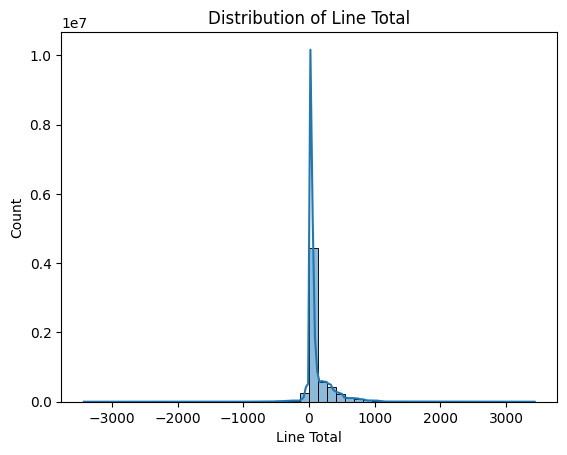

In [40]:
# Quick look at transaction amount distribution
sns.histplot(transactions['Line Total'], bins=50, kde=True)
plt.title('Distribution of Line Total')
plt.show()


In [51]:
# Check for issues
print("Data quality check:")
print(f"Missing values: {transactions.isnull().sum().sum()}")
print(f"Duplicate Customer IDs: {transactions['Customer ID'].duplicated().sum()}")
print()


Data quality check:
Missing values: 4664857
Duplicate Customer IDs: 5015701



Stores Table

In [42]:
print("=== STORES TABLE ===")
print("Our physical locations")
print()

print(stores.head())
print()

print(f"Total stores: {len(stores)}")
print("Stores by country:")
print(stores['Country'].value_counts())
print()

=== STORES TABLE ===
Our physical locations

   Store ID        Country         City         Store Name  \
0         1  United States     New York     Store New York   
1         2  United States  Los Angeles  Store Los Angeles   
2         3  United States      Chicago      Store Chicago   
3         4  United States      Houston      Store Houston   
4         5  United States      Phoenix      Store Phoenix   

   Number of Employees ZIP Code  Latitude  Longitude  
0                    8    10001     40.71     -74.01  
1                    7    90001     34.05    -118.24  
2                    8    60601     41.88     -87.63  
3                    7    77001     29.76     -95.37  
4                    7    85001     33.45    -112.07  

Total stores: 35
Stores by country:
Country
United States     5
中国                5
Deutschland       5
United Kingdom    5
France            5
España            5
Portugal          5
Name: count, dtype: int64



In [53]:
# Check for issues
print("Data quality check:")
print(f"Missing values: {stores.isnull().sum().sum()}")
print(f"Duplicate store IDs: {stores['Store ID'].duplicated().sum()}")
print()


Data quality check:
Missing values: 0
Duplicate store IDs: 0



Employees Table

In [44]:
print("=== EMPLOYEES TABLE ===")
print("Our team")
print()

print("Sample employees:")
print(employees.head(3))
print()

print(f"Total employees: {len(employees)}")
print("Positions:")
print(employees['Position'].value_counts())
print()

=== EMPLOYEES TABLE ===
Our team

Sample employees:
   Employee ID  Store ID            Name           Position
0            1         1  Jennifer Doyle      Store Manager
1            2         1     Linda Gibbs  Assistant Manager
2            3         1    Michael Long            Cashier

Total employees: 403
Positions:
Position
Sales Associate      263
Store Manager         35
Assistant Manager     35
Cashier               35
Stock Clerk           35
Name: count, dtype: int64



In [54]:
# Check for issues
print("Data quality check:")
print(f"Missing values: {employees.isnull().sum().sum()}")
print(f"Duplicate Employee IDs: {employees['Employee ID'].duplicated().sum()}")
print()


Data quality check:
Missing values: 0
Duplicate Employee IDs: 0



In [58]:
print("=== RELATIONSHIP CHECKS ===")
print("Let's see if our tables can talk to each other...")
print()

# Check if customer IDs in transactions exist in customers table
customer_match = transactions['Customer ID'].isin(customers['Customer ID']).sum()
print(f"Transaction customers found in customer table: {customer_match:,}/{len(transactions):,} ({customer_match/len(transactions)*100:.1f}%)")

# Check if product IDs match
product_match = transactions['Product ID'].isin(products['Product ID']).sum()  
print(f"Transaction products found in product table: {product_match:,}/{len(transactions):,} ({product_match/len(transactions)*100:.1f}%)")

# Check if store IDs match
store_match = transactions['Store ID'].isin(stores['Store ID']).sum()
print(f"Transaction stores found in store table: {store_match:,}/{len(transactions):,} ({store_match/len(transactions)*100:.1f}%)")

print()
print("=== DAY 1 SUMMARY ===")
print(" Data loaded successfully")
print(" Found our key tables: customers (1M+), transactions (1M+), products (15k)")
print(" Relationships look good - most foreign keys match")
print(" Ready for deeper analysis tomorrow!")
print()
print("Next steps: Clean up any data issues and start joining tables for analysis")

=== RELATIONSHIP CHECKS ===
Let's see if our tables can talk to each other...

Transaction customers found in customer table: 6,284,272/6,284,272 (100.0%)
Transaction products found in product table: 6,284,272/6,284,272 (100.0%)
Transaction stores found in store table: 6,284,272/6,284,272 (100.0%)

=== DAY 1 SUMMARY ===
 Data loaded successfully
 Found our key tables: customers (1M+), transactions (1M+), products (15k)
 Relationships look good - most foreign keys match
 Ready for deeper analysis tomorrow!

Next steps: Clean up any data issues and start joining tables for analysis
